## OVERVIEW

## Business Problem

## Data Understanding

## Data Preparation


#### Data Cleaning

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [3]:
# Importing the data
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We have missing values in "waterfront", "yr_renovated" and "view" column.

In [6]:
# Dropping columns not needed
df_new = df.drop(['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'id'], axis = 1)
df_new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


In [7]:
df_new.isna().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

Waterfront colums has missing values.

In [8]:
# Filling the NAN values in waterfront columns to No assuming there is no water in the house
df_new.fillna({'waterfront':'NO'}, inplace = True)


In [9]:
df_new.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

No missing values

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   21597 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   yr_built     21597 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 1.6+ MB


## Exploring Data

In [11]:
# Investigate continuous and discrete Numeric predictors
df_new.select_dtypes('number')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
0,221900.0,3,1.00,1180,5650,1.0,1955
1,538000.0,3,2.25,2570,7242,2.0,1951
2,180000.0,2,1.00,770,10000,1.0,1933
3,604000.0,4,3.00,1960,5000,1.0,1965
4,510000.0,3,2.00,1680,8080,1.0,1987
...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,2009
21593,400000.0,4,2.50,2310,5813,2.0,2014
21594,402101.0,2,0.75,1020,1350,2.0,2009
21595,400000.0,3,2.50,1600,2388,2.0,2004


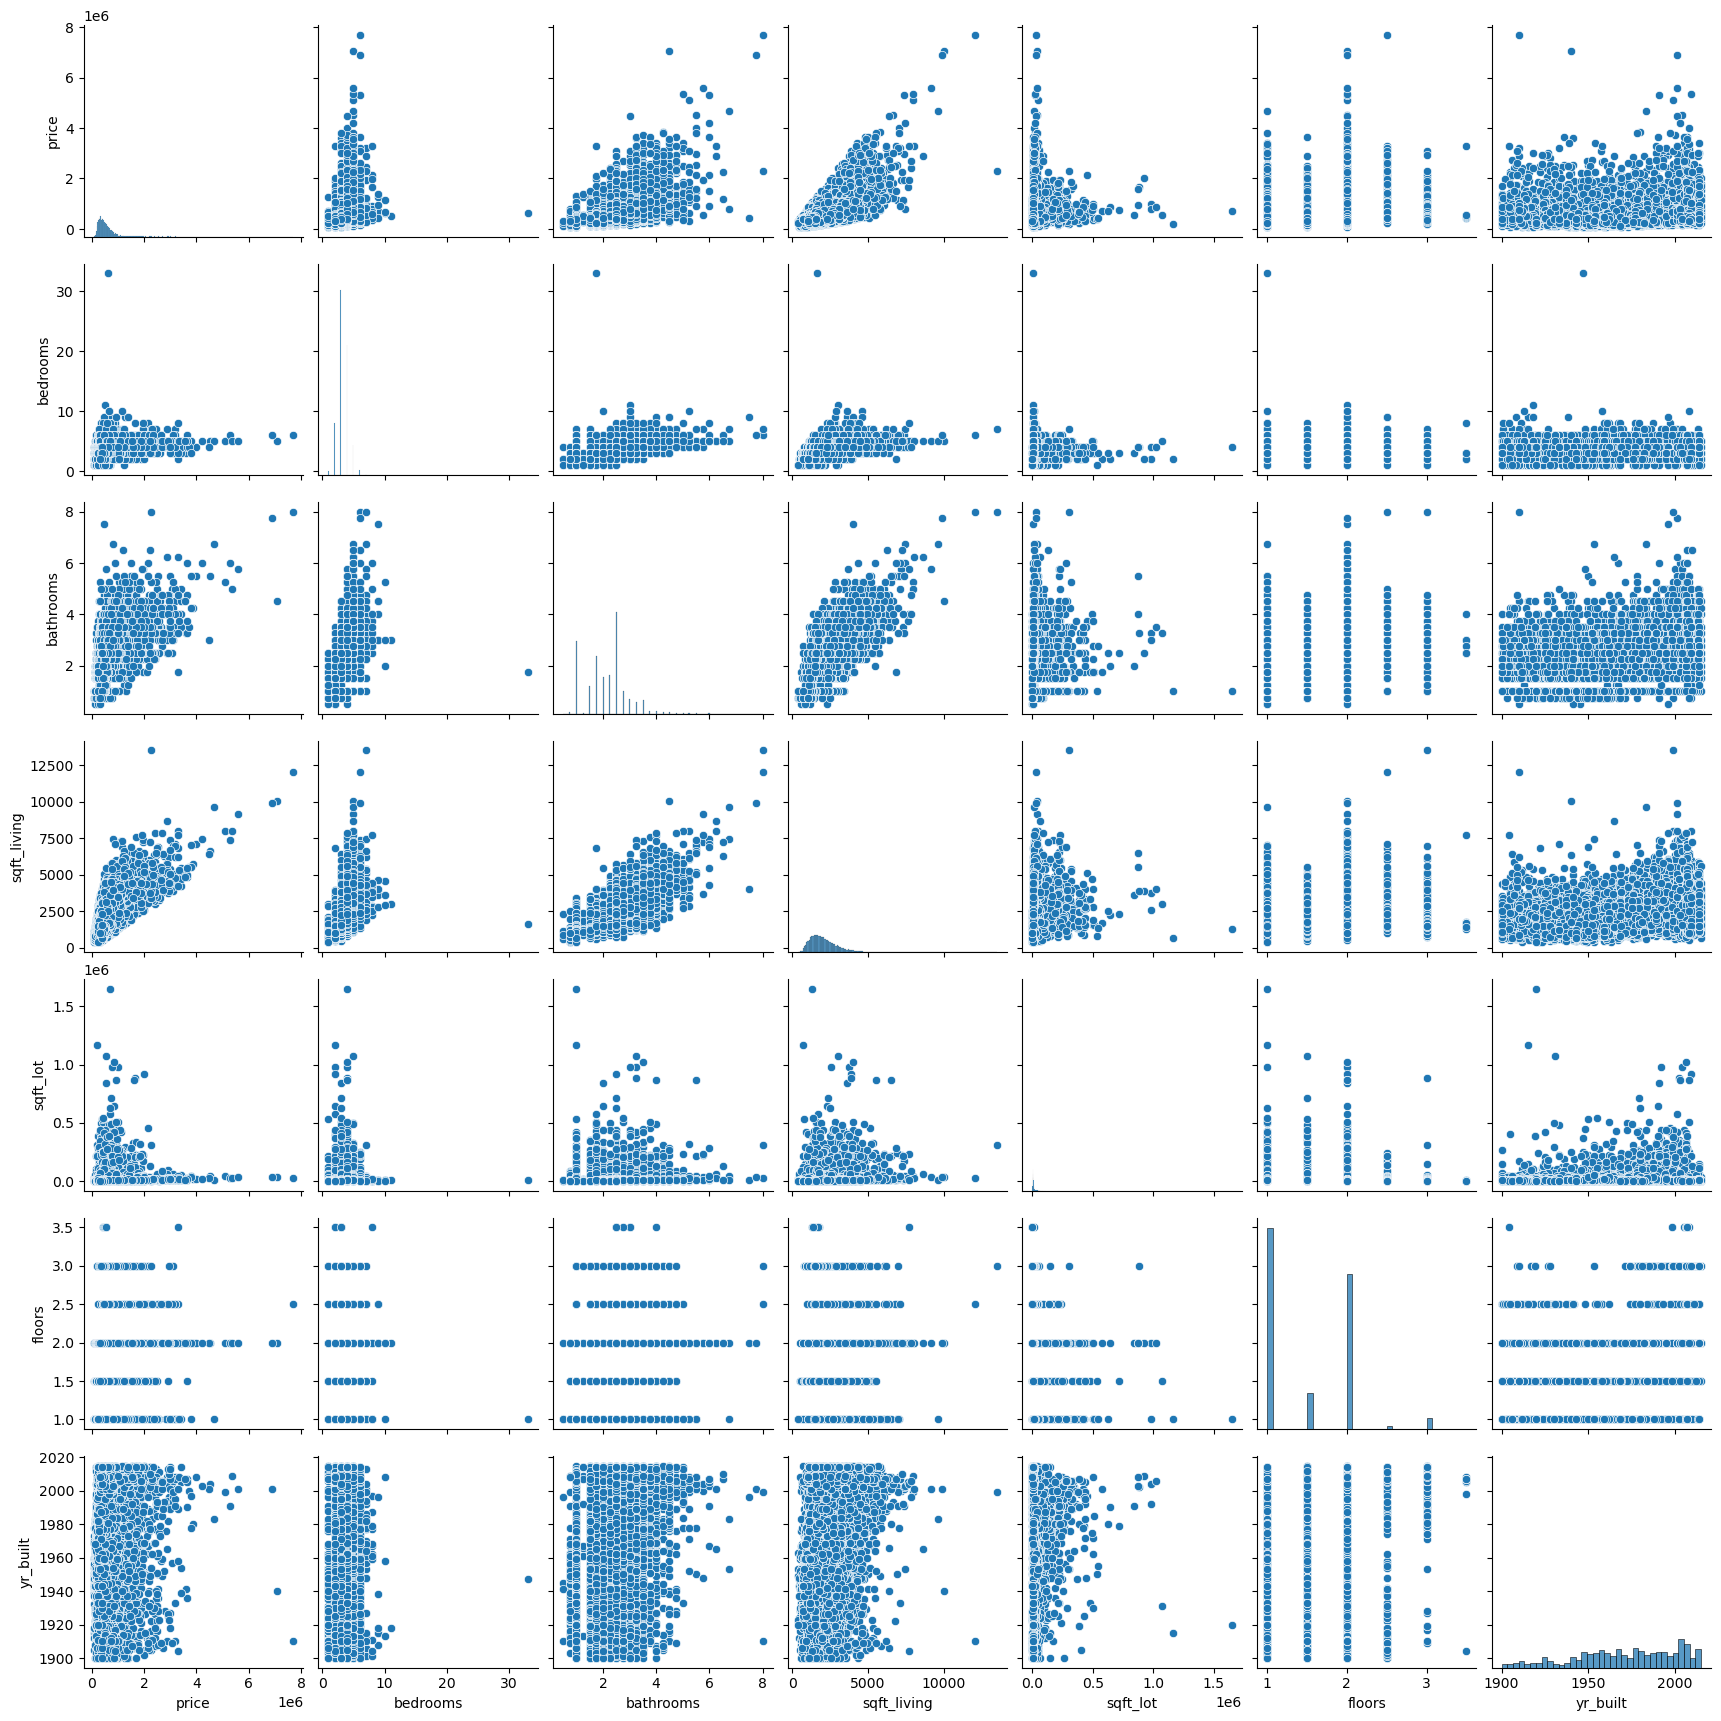

In [12]:
# visualize the numeric predictors
sns.pairplot(df_new)

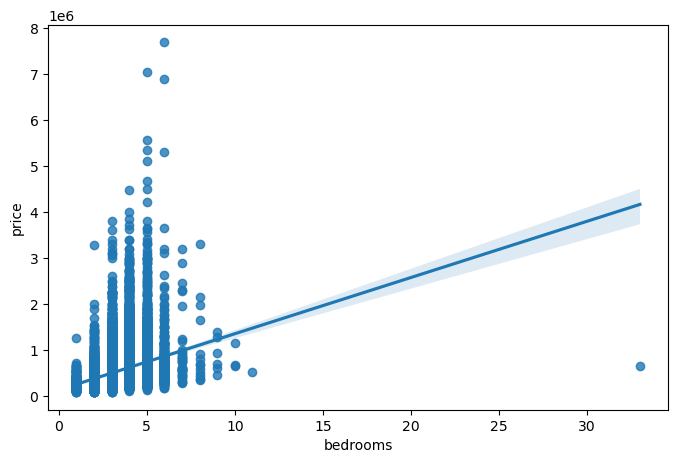

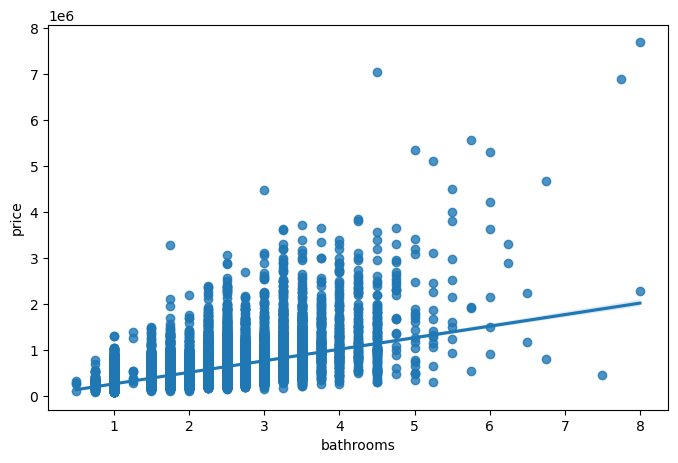

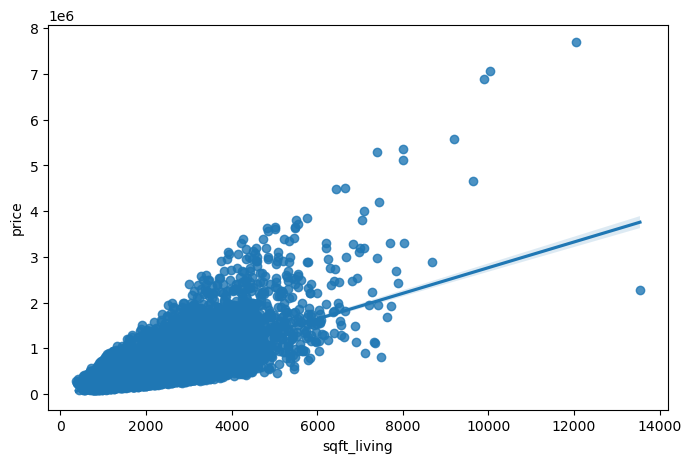

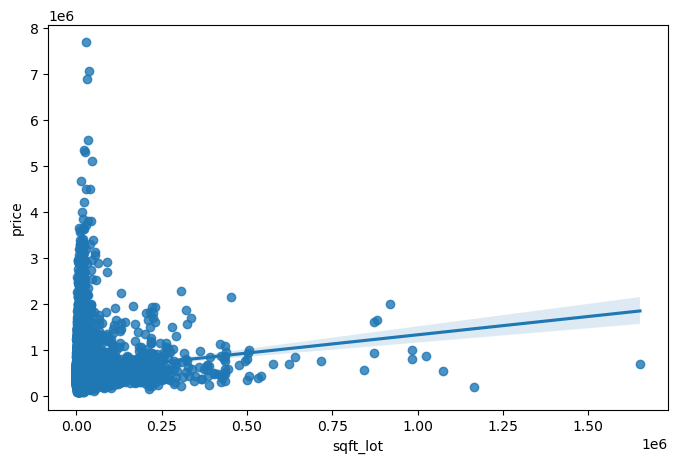

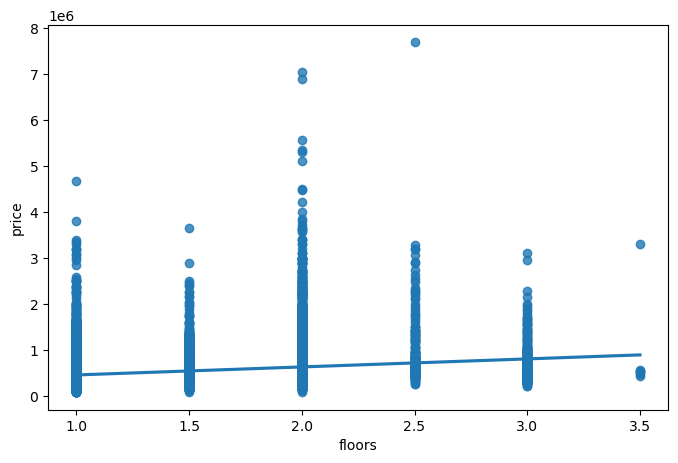

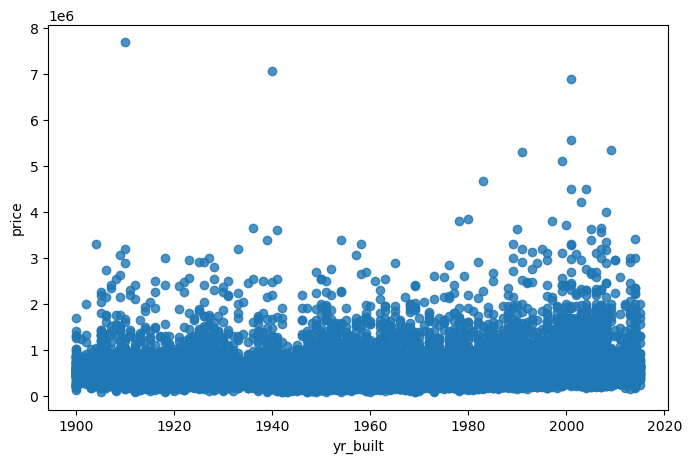

In [13]:
def regplot(data, x_vars, y_var):
    for x_var in x_vars:
        plt.figure(figsize=(8,5))
        sns.regplot(x=x_var, y=y_var, data=df_new)
        plt.show()  # Display the plot

# Example usage:
data = df_new
x_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']
y_variable = df_new['price']  

regplot(data, x_variables, y_variable)


Observed we have outliers in the bedrooms regplot. We need to remove them inorder to have a model that has right predictions.

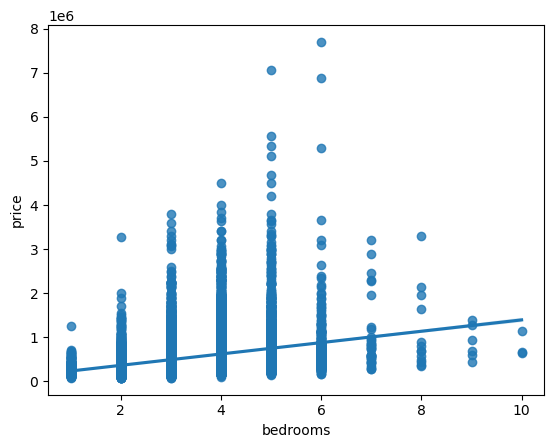

In [14]:
# working on removing the outliers in bedrooms
df_new = df_new[df_new['bedrooms'] <= 10]

sns.regplot(x = 'bedrooms', y= 'price', data = df_new);


Bedrooms has no outliers.

In [15]:
df_new.select_dtypes('object')

,waterfront,condition,grade
0,NO,Average,7 Average
1,NO,Average,7 Average
2,NO,Average,6 Low Average
3,NO,Very Good,7 Average
4,NO,Average,8 Good
...,...,...,...
21592,NO,Average,8 Good
21593,NO,Average,8 Good
21594,NO,Average,7 Average
21595,NO,Average,8 Good


In [16]:
df_new['grade'].value_counts()

grade
7 Average        8972
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: count, dtype: int64

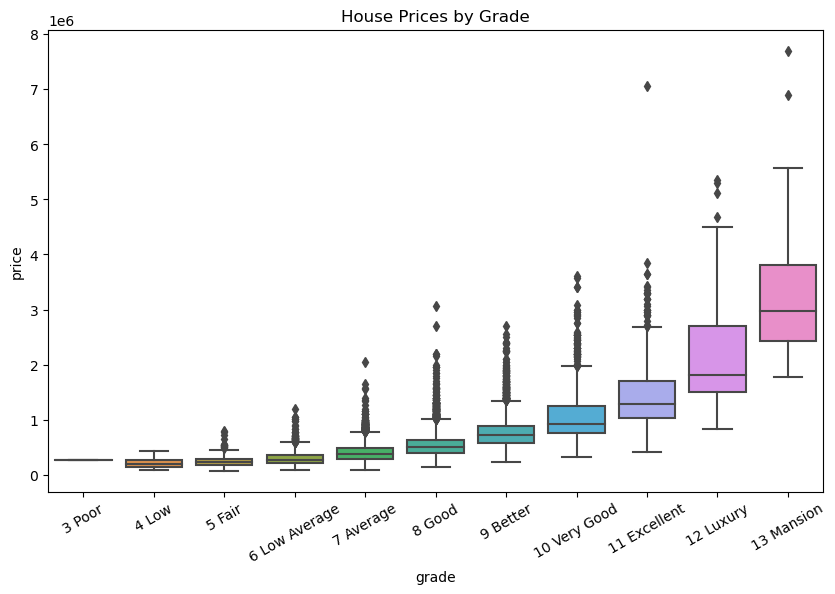

In [17]:
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(x = 'grade', y = 'price', data = df_new, order=['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'])
ax.set_title('House Prices by Grade')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

In [18]:
df_new['condition'].value_counts()

condition
Average      14019
Good          5677
Very Good     1700
Fair           170
Poor            29
Name: count, dtype: int64

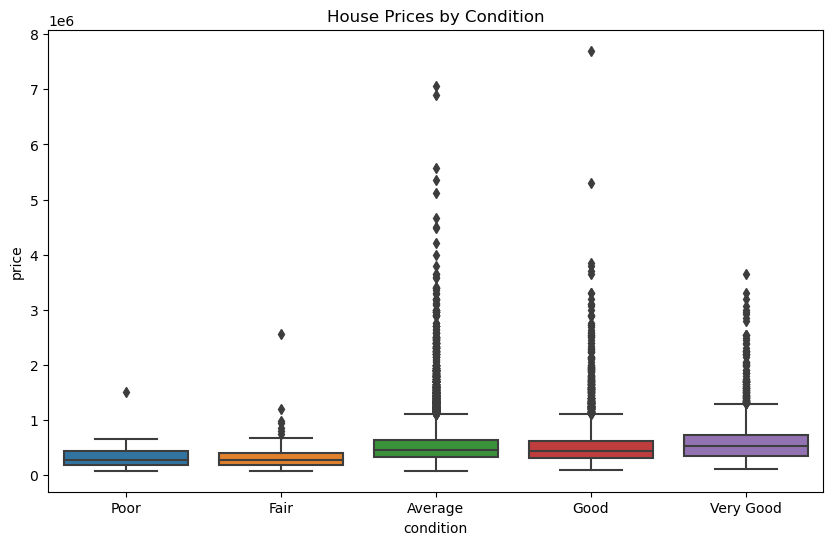

In [19]:
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(x = 'condition', y = 'price', data = df_new, order=['Poor', 'Fair', 'Average', 'Good', 'Very Good'])
ax.set_title('House Prices by Condition')
ax.set_xticklabels(ax.get_xticklabels());

In [20]:
df_new['waterfront'].value_counts()

waterfront
NO     21449
YES      146
Name: count, dtype: int64

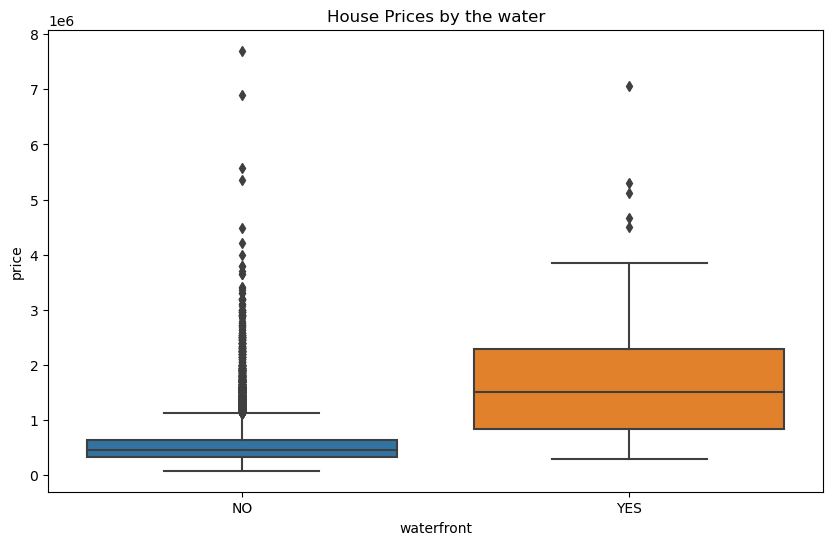

In [21]:
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(x = 'waterfront', y = 'price', data = df_new, order=['NO', 'YES'])
ax.set_title('House Prices by the water')
ax.set_xticklabels(ax.get_xticklabels());

#### Categorical Data

In [22]:
cat_df = df_new[['waterfront', 'condition', 'grade']]

In [23]:
dummies_df = pd.get_dummies(cat_df, dtype= int, drop_first= True)
dummies_df

,waterfront_YES,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
21593,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
21594,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
21595,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [24]:
dummies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21595 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   waterfront_YES       21595 non-null  int64
 1   condition_Fair       21595 non-null  int64
 2   condition_Good       21595 non-null  int64
 3   condition_Poor       21595 non-null  int64
 4   condition_Very Good  21595 non-null  int64
 5   grade_11 Excellent   21595 non-null  int64
 6   grade_12 Luxury      21595 non-null  int64
 7   grade_13 Mansion     21595 non-null  int64
 8   grade_3 Poor         21595 non-null  int64
 9   grade_4 Low          21595 non-null  int64
 10  grade_5 Fair         21595 non-null  int64
 11  grade_6 Low Average  21595 non-null  int64
 12  grade_7 Average      21595 non-null  int64
 13  grade_8 Good         21595 non-null  int64
 14  grade_9 Better       21595 non-null  int64
dtypes: int64(15)
memory usage: 2.6 MB


In [25]:
cont_df = df_new[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built', 'price']]

In [26]:
data = cont_df.join(dummies_df)
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,price,waterfront_YES,condition_Fair,condition_Good,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,3,1.00,1180,5650,1.0,1955,221900.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,2.25,2570,7242,2.0,1951,538000.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,1.00,770,10000,1.0,1933,180000.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,3.00,1960,5000,1.0,1965,604000.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3,2.00,1680,8080,1.0,1987,510000.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
# converting the dtypes to int
data['bathrooms'] = data['bathrooms'].apply(int)
data['floors'] = data['floors'].apply(int)
data['price'] = data['price'].apply(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21595 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   bedrooms             21595 non-null  int64
 1   bathrooms            21595 non-null  int64
 2   sqft_living          21595 non-null  int64
 3   sqft_lot             21595 non-null  int64
 4   floors               21595 non-null  int64
 5   yr_built             21595 non-null  int64
 6   price                21595 non-null  int64
 7   waterfront_YES       21595 non-null  int64
 8   condition_Fair       21595 non-null  int64
 9   condition_Good       21595 non-null  int64
 10  condition_Poor       21595 non-null  int64
 11  condition_Very Good  21595 non-null  int64
 12  grade_11 Excellent   21595 non-null  int64
 13  grade_12 Luxury      21595 non-null  int64
 14  grade_13 Mansion     21595 non-null  int64
 15  grade_3 Poor         21595 non-null  int64
 16  grade_4 Low          21595 

### Scaling the data

In [38]:

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform
X_scaled = scaler.fit_transform(data)


AttributeError: 'numpy.ndarray' object has no attribute 'corr'

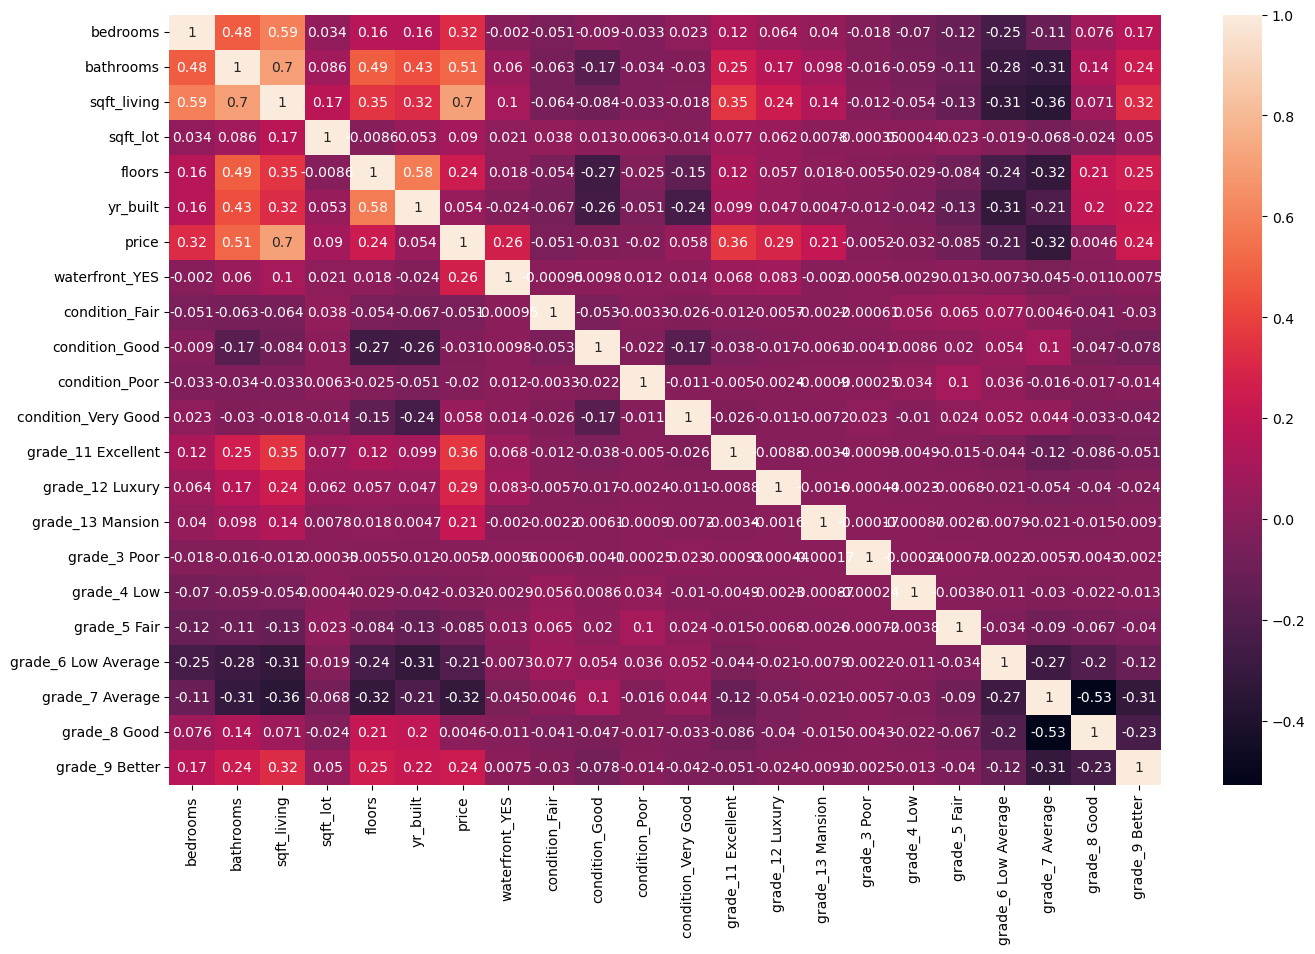

In [29]:
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(data.corr(), annot=True);

In [30]:
data.corr()['price']

bedrooms               0.316504
bathrooms              0.510696
sqft_living            0.701948
sqft_lot               0.089879
floors                 0.237287
yr_built               0.053964
price                  1.000000
waterfront_YES         0.264308
condition_Fair        -0.051431
condition_Good        -0.030753
condition_Poor        -0.019886
condition_Very Good    0.057503
grade_11 Excellent     0.357592
grade_12 Luxury        0.291070
grade_13 Mansion       0.211807
grade_3 Poor          -0.005155
grade_4 Low           -0.031617
grade_5 Fair          -0.084549
grade_6 Low Average   -0.209461
grade_7 Average       -0.316086
grade_8 Good           0.004582
grade_9 Better         0.235864
Name: price, dtype: float64

We can see that

## Data Modeling

### Baseline Model


In [33]:
X = data[['sqft_living']]
y = data[['price']]

y_log = np.log(y)

In [35]:
# Prepare the feature matrix and target variable
# Apply square root transformation to the target variable

# Add a constant column to the feature matrix
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y_log, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 2.020e+04
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:52:17   Log-Likelihood:                -9661.2
No. Observations:               21595   AIC:                         1.933e+04
Df Residuals:                   21593   BIC:                         1.934e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2187      0.006   1915.338      

#### Observation

The R-squared value is 0.483, which means that approximately 48.3% of the variation in the mean price can be explained by the variables in the model.
The coefficient for the constant term (intercept) is 12.2187, which represents the estimated mean price when all other variables are held constant.
The coefficient for the sqft_living variable is 0.0004. This indicates that, on average, a one-unit increase in the square root of living area is associated with a 0.0004 unit increase in the mean price.


#### Second model

In [54]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Split your data into features (X) and target variable (y)
X = data.drop(['price'], axis = 1)
y = data['price']

# Create a base estimator for RFE (e.g., Linear Regression)
base_estimator = LinearRegression()

# Create an RFE object
rfe = RFE(estimator=base_estimator, n_features_to_select=10)  # Adjust the number of features to select

# Fit the RFE object to your data
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]
selected_features



Index(['waterfront_YES', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good'],
      dtype='object')

To solve multicolinerity we used Recursive Feature Elimination (RFE):
RFE recursively removes features from the dataset based on their importance in predicting the target variable. It fits the model multiple times, each time removing the least important feature until a desired number of features remains.

In [55]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.41155076, -1.02267713, -0.98061201, ...,  1.18614193,
        -0.62492756, -0.37118271],
       [-0.41155076,  0.33973574,  0.53338312, ...,  1.18614193,
        -0.62492756, -0.37118271],
       [-1.51943391, -1.02267713, -1.42718611, ..., -0.84306943,
        -0.62492756, -0.37118271],
       ...,
       [-1.51943391, -2.38509   , -1.15488483, ...,  1.18614193,
        -0.62492756, -0.37118271],
       [-0.41155076,  0.33973574, -0.52314585, ..., -0.84306943,
         1.60018548, -0.37118271],
       [-1.51943391, -2.38509   , -1.15488483, ...,  1.18614193,
        -0.62492756, -0.37118271]])

In [53]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the model using the training data
X_train_with_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_with_const)
results = model.fit()

# Make predictions using the trained model
X_test_with_const = sm.add_constant(X_test)
y_pred = results.predict(X_test_with_const)

# Evaluate the performance of the model
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)




ValueError: shapes (4319,21) and (22,) not aligned: 21 (dim 1) != 22 (dim 0)

In [46]:
X_1 = X_scaled[:, selected_features]
model = sm.OLS(y_log, sm.add_constant(X_1))
results = model.fit()
results.summary()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

#### Investigate multicollinearity

In [ ]:
corr = X_1.corr()
corr

,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good
waterfront_YES,1.000000,0.068409,0.082899,-0.002025,-0.000561,-0.002919,0.012690,-0.007304,-0.045476,-0.011322
grade_11 Excellent,0.068409,1.000000,-0.008826,-0.003367,-0.000934,-0.004854,-0.014606,-0.044290,-0.115671,-0.085741
grade_12 Luxury,0.082899,-0.008826,1.000000,-0.001579,-0.000438,-0.002276,-0.006848,-0.020767,-0.054235,-0.040202
grade_13 Mansion,-0.002025,-0.003367,-0.001579,1.000000,-0.000167,-0.000868,-0.002613,-0.007923,-0.020691,-0.015338
grade_3 Poor,-0.000561,-0.000934,-0.000438,-0.000167,1.000000,-0.000241,-0.000724,-0.002197,-0.005737,-0.004253
grade_4 Low,-0.002919,-0.004854,-0.002276,-0.000868,-0.000241,1.000000,-0.003767,-0.011422,-0.029829,-0.022111
grade_5 Fair,0.012690,-0.014606,-0.006848,-0.002613,-0.000724,-0.003767,1.000000,-0.034366,-0.089751,-0.066529
grade_6 Low Average,-0.007304,-0.044290,-0.020767,-0.007923,-0.002197,-0.011422,-0.034366,1.000000,-0.272154,-0.201735
grade_7 Average,-0.045476,-0.115671,-0.054235,-0.020691,-0.005737,-0.029829,-0.089751,-0.272154,1.000000,-0.526857
grade_8 Good,-0.011322,-0.085741,-0.040202,-0.015338,-0.004253,-0.022111,-0.066529,-0.201735,-0.526857,1.000000


In [ ]:
X_const = sm.add_constant(X_1)
# Fit the model and obtain the predicted values
model1 = sm.OLS(y, X_const)  
results = model1.fit()
predicted_values = results.predict(X_const)

# Calculate the residuals
residuals = y - predicted_values

# Calculate the RMSE
rmse = np.sqrt(np.mean(residuals**2))
rmse

250620.4676231488

This is a high RMSE thus does not provide accurate predictions despite it having a higher R-squared compared to my second model.

#### Homoscedasticity check

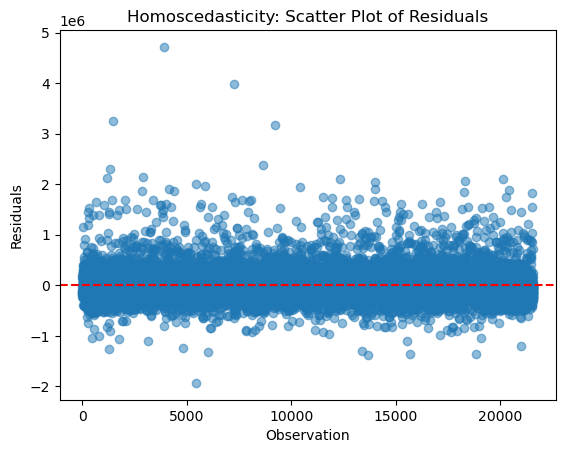

In [ ]:
residuals = results.resid

# Create the scatter plot of residuals
plt.scatter(x=range(residuals.shape[0]), y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.title('Homoscedasticity: Scatter Plot of Residuals');

The plot shows that the assumption of homoscedasticity holds.

#### Normality check

Text(0.5, 1.0, 'Q-Q Plot of Residuals')

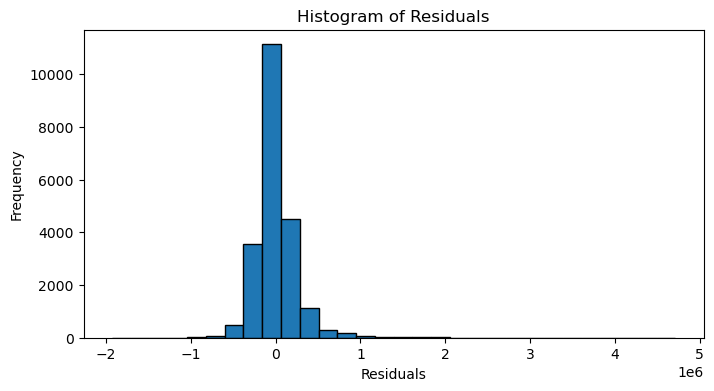

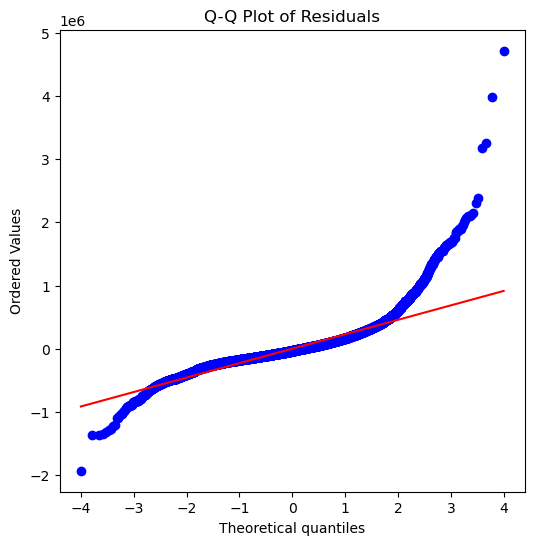

In [ ]:
# Plot the histogram of residuals
plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals');

# Plot the Q-Q plot of residuals
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')


The histogram of residuals is relatively normal.
The Q-Q plot also shows the plot is relatively normal with exception of a few outliers.

#### Observations
R-squared and Adjusted R-squared: The R-squared value is 0.535, indicating that approximately 53.5% of the variance in the target variable (price) is explained by the model. 
F-statistic and Prob (F-statistic): The F-statistic is 2479, indicating the overall statistical significance of the model. 

The coefficients represent the estimated effect of each feature on the target variable (price). Example, the coefficient for waterfront_YES suggests that, having a waterfront property is associated with an increase in price of approximately 889,600 units.

The P-value represents the statistical significance of each coefficient. A P-value less than 0.05 significance level indicates that the coefficient is statistically significant. Waterfront, Grade 11 excellent, Grade 12 luxury and Grade 13 mansion are statistically significant.

However, further analysis and interpretation should consider the specific context, assumptions, and limitations of the model.


#### Log Transforming a feature

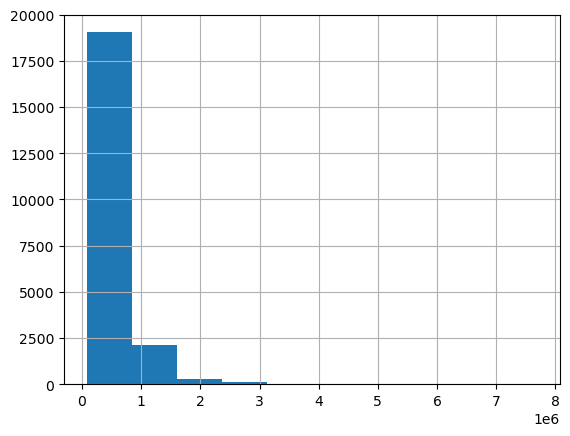

In [ ]:
# Checking the if y is normally distributed.
y.hist();

y is left skewed.

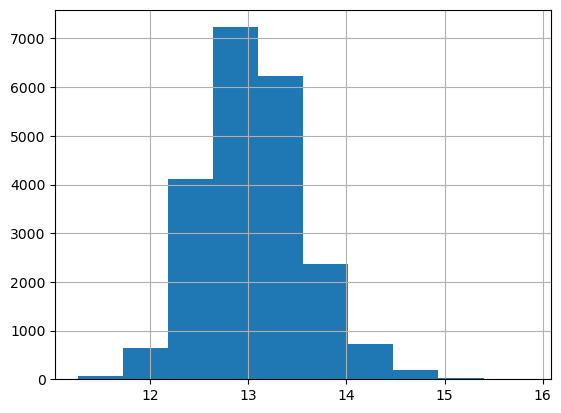

In [ ]:
# Transforming y using log
y_log = np.log(y)
y_log.hist();

y is now normally distributed.

In [ ]:
# creating a model using new log(y)

model_1 = sm.OLS(y_log, sm.add_constant(X_1)).fit()
print(model_1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     2137.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:09:07   Log-Likelihood:                -9361.5
No. Observations:               21595   AIC:                         1.874e+04
Df Residuals:                   21584   BIC:                         1.883e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.5729    

Obtaining the RMSE of Model_1

In [ ]:

X_const = sm.add_constant(X_1)
# Fit the model and obtain the predicted values
model1 = sm.OLS(y_log, X_const)  # Drop the 'const' column from X
results1 = model1.fit()
predicted_values1 = results1.predict(X_const)


# Calculate the residuals
residuals1 = y_log - predicted_values1

# Calculate the RMSE
rmse1 = np.sqrt(np.mean(residuals1**2))
rmse1



0.37327606244485145

Model1 has a much lower rmse compared to the first model this we can say it provides accurate predictions and captures undelying patterns in the data.

#### Homescadastisity of model_1

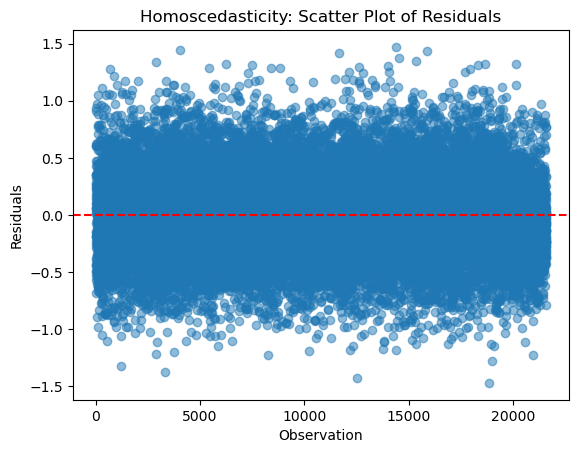

In [ ]:
residuals_1 = model_1.resid

# Create the scatter plot of residuals
plt.scatter(x=range(residuals_1.shape[0]), y=residuals_1, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.title('Homoscedasticity: Scatter Plot of Residuals');

#### Normality of Model_1

Text(0.5, 1.0, 'Q-Q Plot of Residuals')

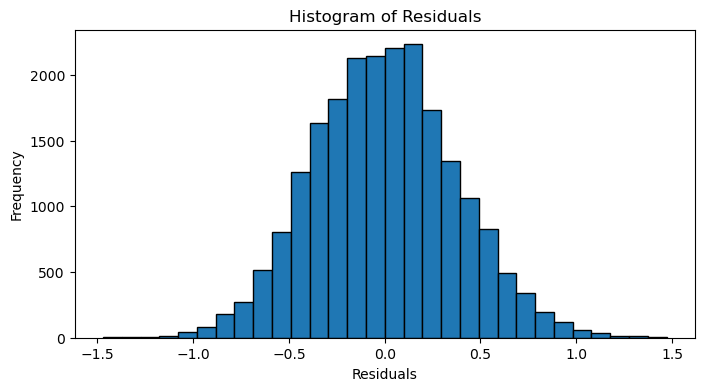

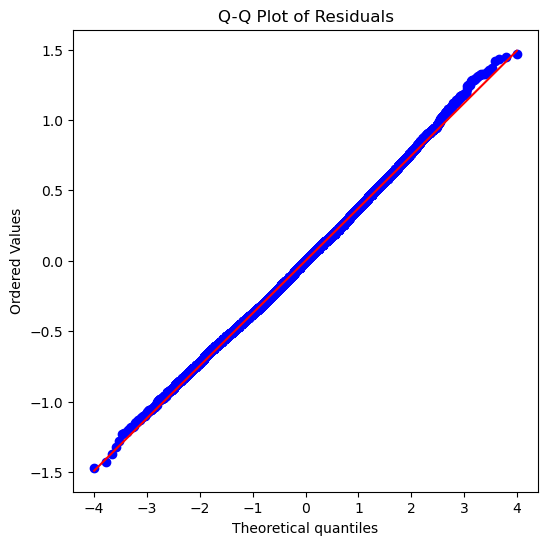

In [ ]:
# Plot the histogram of residuals
plt.figure(figsize=(8, 4))
plt.hist(residuals_1, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals');

# Plot the Q-Q plot of residuals
plt.figure(figsize=(6, 6))
stats.probplot(residuals_1, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

We can see Model1 is normally distributed. The Q-Q plot shows its is perfectly distributed.

#### Observations
R-squared and Adjusted R-squared: The R-squared value is 0.497, indicating that approximately 49.7% of the variance in the target variable (price) is explained by the model. 
F-statistic and Prob (F-statistic): The F-statistic is 2137, indicating the overall statistical significance of the model. 

The coefficients represent the estimated effect of each feature on the target variable (price). Example, the coefficient for waterfront_YES suggests that, having a waterfront property is associated with an increase in price of approximately 0.7461 units.

The P-value represents the statistical significance of each coefficient. A P-value less than 0.05 significance level indicates that the coefficient is statistically significant.

Based on the provided information, it seems that the presence of a waterfront, specific grade levels, and property types have a significant impact on the price prediction.

However, further analysis and interpretation should consider the specific context, assumptions, and limitations of the model.

In [ ]:
# Assuming 'results1' represents the fitted model results for the first model

# Get the coefficients and corresponding grade level names
coefficients = results1.params[1:]  # Exclude the intercept coefficient
grade_levels = coefficients.index

# Sort the coefficients by their absolute values in descending order
sorted_coefficients = coefficients.abs().sort_values(ascending=False)

# Get the grade level with the highest impact on price
most_significant_grade_level = sorted_coefficients.index[0]
impact_on_price = coefficients[most_significant_grade_level]

print(f"The grade level that affects price the most is {most_significant_grade_level} "
      f"with a coefficient of {impact_on_price:.2f}")


The grade level that affects price the most is grade_13 Mansion with a coefficient of 1.46


## Visualizing My conclusions

In [ ]:
dummies_df1 = pd.get_dummies(cat_df, dtype= int)

data1 = cont_df.join(dummies_df1)
data1.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,price,waterfront_NO,waterfront_YES,condition_Average,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,3,1.00,1180,5650,1.0,1955,221900.0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,3,2.25,2570,7242,2.0,1951,538000.0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2,1.00,770,10000,1.0,1933,180000.0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,4,3.00,1960,5000,1.0,1965,604000.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3,2.00,1680,8080,1.0,1987,510000.0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Assuming 'data' is your dataframe containing the variables

# Calculate the mean price for waterfront and non-waterfront properties
mean_waterfront_price = data1[data1['waterfront_YES'] == 1]['price'].mean()
mean_non_waterfront_price = data1[data1['waterfront_YES'] == 0]['price'].mean()

# Display the mean prices
print("Mean Price - Waterfront:", mean_waterfront_price)
print("Mean Price - Non-Waterfront:", mean_non_waterfront_price)


Mean Price - Waterfront: 1717214.7260273972
Mean Price - Non-Waterfront: 532281.7729497879


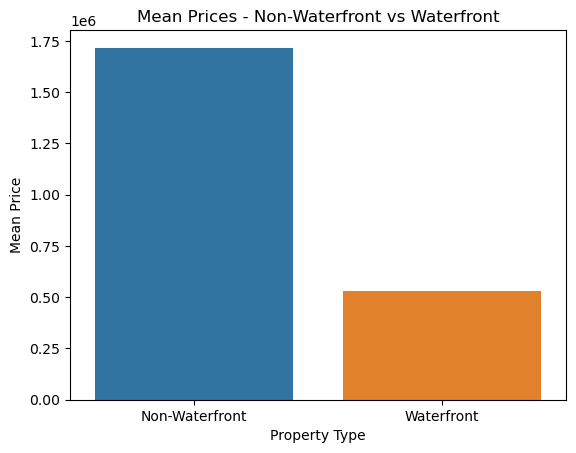

In [ ]:
mean_prices = [1717214.7260273972, 532281.7729497879]
labels = ['Non-Waterfront', 'Waterfront']

sns.barplot(x=labels, y=mean_prices)
plt.title('Mean Prices - Non-Waterfront vs Waterfront')
plt.xlabel('Property Type')
plt.ylabel('Mean Price')

plt.show()


In [ ]:
# Assuming 'data' is your dataframe containing the variables

# Calculate the mean price for waterfront and non-waterfront properties
mean_Poor_price = data1[data1['grade_3 Poor'] == 1]['price'].mean()
mean_Low_price = data1[data1['grade_4 Low'] == 1]['price'].mean()
mean_Fair_price = data1[data1['grade_5 Fair'] == 1]['price'].mean()
mean_Low_Average_price = data1[data1['grade_6 Low Average'] == 1]['price'].mean()
mean_Average_price = data1[data1['grade_7 Average'] == 1]['price'].mean()
mean_Good_price = data1[data1['grade_8 Good'] == 1]['price'].mean()
mean_Better_price = data1[data1['grade_9 Better'] == 1]['price'].mean()
mean_Very_Good_price = data1[data1['grade_10 Very Good'] == 1]['price'].mean()
mean_Excellent_price = data1[data1['grade_11 Excellent'] == 1]['price'].mean()
mean_Luxury_price = data1[data1['grade_12 Luxury'] == 1]['price'].mean()
mean_Mansion_price = data1[data1['grade_13 Mansion'] == 1]['price'].mean()

# Display the mean prices
print("Mean Grade 3 Price - :", mean_Poor_price)
print("Mean Grade 4 Price - :", mean_Low_price)
print("Mean Grade 5 Price - :", mean_Fair_price)
print("Mean Grade 6 Price - :", mean_Low_Average_price)
print("Mean Grade 7 Price - :", mean_Average_price)
print("Mean Grade 8 Price - :", mean_Good_price)
print("Mean Grade 9 Price - :", mean_Better_price)
print("Mean Grade 10 Price - :", mean_Very_Good_price)
print("Mean Grade 11 Price - :", mean_Excellent_price)
print("Mean Grade 12 Price - :", mean_Luxury_price)
print("Mean Grade 13 Price - :", mean_Mansion_price)






Mean Grade 3 Price - : 262000.0
Mean Grade 4 Price - : 212001.85185185185
Mean Grade 5 Price - : 248523.97107438016
Mean Grade 6 Price - : 301916.57065750734
Mean Grade 7 Price - : 402555.02630405704
Mean Grade 8 Price - : 542986.8
Mean Grade 9 Price - : 773738.2221797323
Mean Grade 10 Price - : 1072347.467372134
Mean Grade 11 Price - : 1497792.3784461152
Mean Grade 12 Price - : 2202528.0898876404
Mean Grade 13 Price - : 3710769.230769231


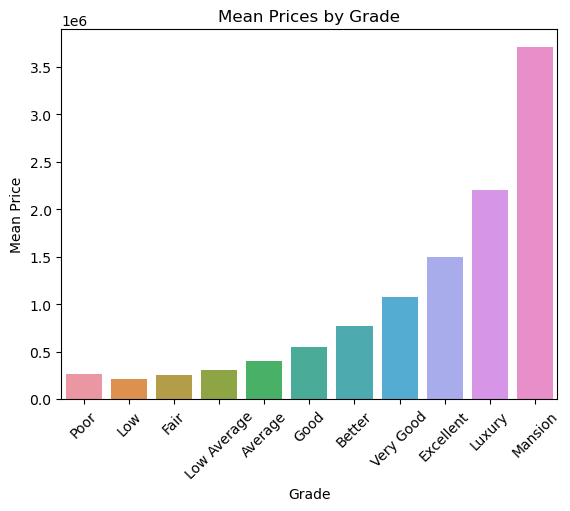

In [ ]:
grades = ['Poor', 'Low', 'Fair', 'Low Average', 'Average', 'Good', 'Better', 'Very Good', 'Excellent', 'Luxury', 'Mansion']
mean_prices = [mean_Poor_price, mean_Low_price, mean_Fair_price, mean_Low_Average_price, mean_Average_price,
               mean_Good_price, mean_Better_price, mean_Very_Good_price, mean_Excellent_price, mean_Luxury_price, mean_Mansion_price]

sns.barplot(x=grades, y=mean_prices)
plt.title('Mean Prices by Grade')
plt.xlabel('Grade')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


In [ ]:
# Calculate the mean price for waterfront and non-waterfront properties
mean_Poor_price = data1[data1['condition_Poor'] == 1]['price'].mean()
mean_Fair_price = data1[data1['condition_Fair'] == 1]['price'].mean()
mean_Average_price = data1[data1['condition_Average'] == 1]['price'].mean()
mean_Good_price = data1[data1['condition_Good'] == 1]['price'].mean()
mean_Very_Good_price = data1[data1['condition_Very Good'] == 1]['price'].mean()

print("Mean Poor Price - :", mean_Poor_price)
print("Mean Fair Price - :", mean_Fair_price)
print("Mean Average Price - :", mean_Average_price)
print("Mean Good Price - :", mean_Good_price)
print("Mean Very Good Price - :", mean_Very_Good_price)


Mean Poor Price - : 341067.2413793103
Mean Fair Price - : 328178.7588235294
Mean Average Price - : 542174.6389899423
Mean Good Price - : 521374.450413951
Mean Very Good Price - : 612561.6117647059


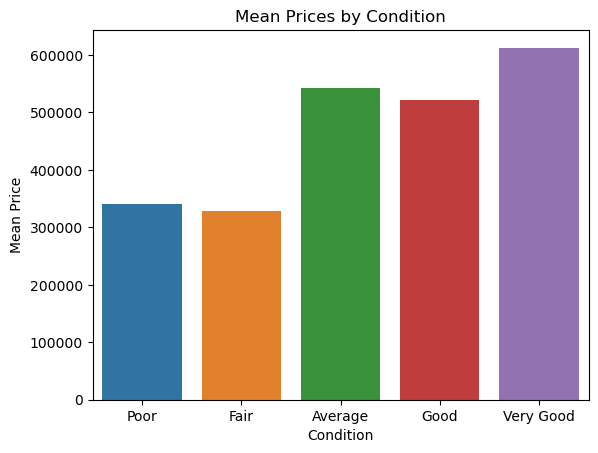

In [ ]:
import seaborn as sns

conditions = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
mean_prices = [mean_Poor_price, mean_Fair_price, mean_Average_price, mean_Good_price, mean_Very_Good_price]

sns.barplot(x=conditions, y=mean_prices)
plt.title('Mean Prices by Condition')
plt.xlabel('Condition')
plt.ylabel('Mean Price')

plt.show()



In [ ]:
data1.corr()['price']

bedrooms               0.316504
bathrooms              0.525934
sqft_living            0.701948
sqft_lot               0.089879
floors                 0.256828
yr_built               0.053964
price                  1.000000
waterfront_NO         -0.264308
waterfront_YES         0.264308
condition_Average      0.006968
condition_Fair        -0.051431
condition_Good        -0.030753
condition_Poor        -0.019886
condition_Very Good    0.057503
grade_10 Very Good     0.340948
grade_11 Excellent     0.357592
grade_12 Luxury        0.291070
grade_13 Mansion       0.211807
grade_3 Poor          -0.005155
grade_4 Low           -0.031617
grade_5 Fair          -0.084549
grade_6 Low Average   -0.209461
grade_7 Average       -0.316086
grade_8 Good           0.004582
grade_9 Better         0.235864
Name: price, dtype: float64

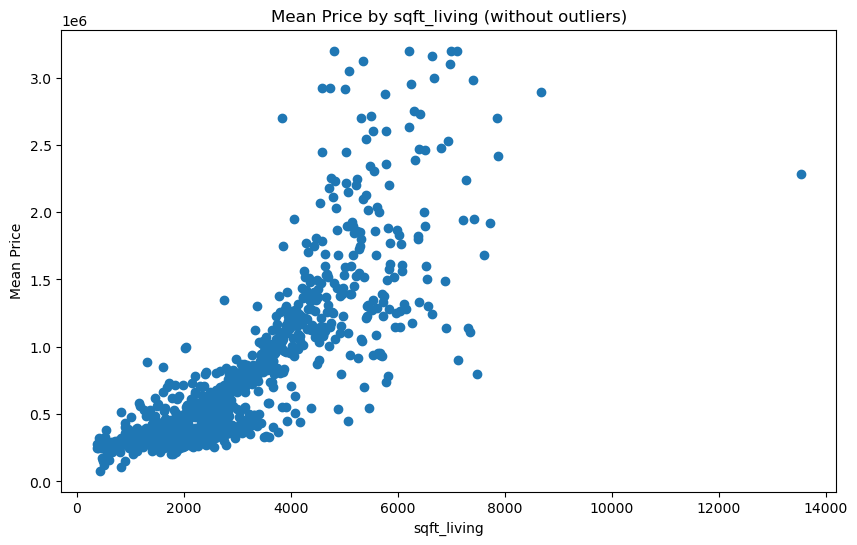

In [ ]:
# Calculate the mean price for each sqft_living value
mean_prices = data1.groupby('sqft_living')['price'].mean().reset_index()

# Remove outliers based on a certain criterion (e.g., z-score)
z_scores = np.abs((mean_prices['price'] - mean_prices['price'].mean()) / mean_prices['price'].std())
threshold = 3  # Adjust the threshold as needed
mean_prices = mean_prices[z_scores < threshold]

# Plot the remaining data points
plt.figure(figsize=(10, 6))
plt.scatter(mean_prices['sqft_living'], mean_prices['price'])
plt.xlabel('sqft_living')
plt.ylabel('Mean Price')
plt.title('Mean Price by sqft_living (without outliers)')
plt.show()



In [ ]:
import statsmodels.api as sm
import numpy as np

# Prepare the feature matrix and target variable
X = data1[['sqft_living', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good', 'grade_9 Better', 'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion']]



y = np.sqrt(data1['price'])  # Apply square root transformation to the target variable

# Add a constant column to the feature matrix
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     2805.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:29:57   Log-Likelihood:            -1.3581e+05
No. Observations:               21595   AIC:                         2.716e+05
Df Residuals:                   21583   BIC:                         2.717e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 585.5901    

Sqft_living has the highest correlation to price but this does not mean its significantly related. Due to the fact that grade plays a major role in the price and waterfront. A large house that has a poor or low grade will be cheap